In [1]:
# 다중 상관 분석
# 두 개 이상의 독립 변수와 하나의 종속 변수 사이의 상관관계를 분석하는 방법

# 다중 상관 분석 실습
import seaborn as sns

# titanic 데이터셋에서 일부 변수 선택
cols = ['survived', 'pclass', 'age', 'fare']

# 선택한 변수들을 가지고 새로운 데이터프레임 생성
df = sns.load_dataset('titanic')[cols].dropna()

# 다중 상관 분석 수행
corr = df.corr()

# 결과 출력
print(corr)

          survived    pclass       age      fare
survived  1.000000 -0.359653 -0.077221  0.268189
pclass   -0.359653  1.000000 -0.369226 -0.554182
age      -0.077221 -0.369226  1.000000  0.096067
fare      0.268189 -0.554182  0.096067  1.000000


해석 방법 : 상관 계수가 0.7 이상이면 강한 양의 상관 관계, -0.7 이하이면 강한 음의 상관 관계라고 해석. 또한, p-value가 0.05보다 작으면 통계적으로 유의미한 상관관계가 있다고 판단할 수 있다.

In [6]:
# 부분 상관 분석
# 두 변수 간의 상관관계에서 다른 변수드르이 영향을 제거한 후에 얻어진 상관관계를 계산하는 방법
# 즉, 변수 x와 y의 상관관게에서 z 변수의 영향을 제거하여 x와 y의 상관관계를 구하는 방법

# 시계열 상관 분석 실습
# 주가 데이터를 활용하여 실습하기 위해 삼성 전자, LG 전자 주식 가격을 이용
# 단 랜덤하게 더미 값을 만들어서 사용하여 실습
# 시계열 상관 분석은 시간축으로 되어있는 데이터의 상관관계를 분석하는 것이므로 데이터의 시간축 정보가 반드시 포함되어야 한다.
# 또한, 결측치 등의 이상치를 처리하는 과정이 필요할 수도 있음

import pandas as pd
import random

# 삼성 전자 주식 데이터
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices=[random.randint(80000, 90000) for _ in range(100)]
samsung_data = {'Date' : dates, '005930.KS':samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

# LG 전자 주식 데이터 
lg_prices = [random.randint(140000, 160000) for _ in range(100)]
lg_data = {'Date' : dates, '066570.KS' : lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

# 두 데이터 프레임을 합쳐서 하나의 데이터 프레임으로 만들기
df = pd.concat([samsung_df, lg_df], axis=1)
df = df.loc[:, ['005930.KS', '066570.KS']]
df.columns = ['Samsung', 'LG']

# csv 파일로 저장
df.to_csv('./data/stock_price.csv')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 주식 데이터 불러오기
df = pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df)
# 두 종목의 수익률 계산
returns = df.pct_change()
print(returns)

# 수익률 간의 상관 계수 계산
corr_matrix = returns.corr()
print(corr_matrix)

            Samsung      LG
Date                       
2021-01-04    87007  151076
2021-01-05    83239  155261
2021-01-06    80170  151123
2021-01-07    84488  152219
2021-01-08    88750  159216
...             ...     ...
2021-04-09    89705  146687
2021-04-10    86166  151994
2021-04-11    88321  150448
2021-04-12    82701  141499
2021-04-13    82238  141423

[100 rows x 2 columns]
             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05 -0.043307  0.027701
2021-01-06 -0.036870 -0.026652
2021-01-07  0.053861  0.007252
2021-01-08  0.050445  0.045967
...              ...       ...
2021-04-09  0.104374 -0.007396
2021-04-10 -0.039452  0.036179
2021-04-11  0.025010 -0.010171
2021-04-12 -0.063632 -0.059482
2021-04-13 -0.005598 -0.000537

[100 rows x 2 columns]
          Samsung        LG
Samsung  1.000000 -0.001252
LG      -0.001252  1.000000


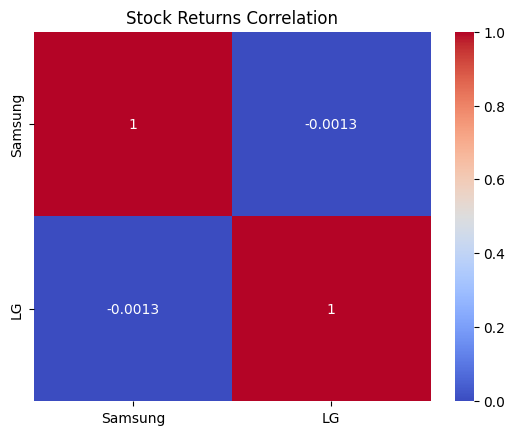

In [10]:
# 히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Returns Correlation')
plt.show()